In [5]:
import pandas as pd
import numpy as np
import re

In [45]:
df = pd.read_csv("data/nyc.csv")
del df['Unnamed: 0']

In [46]:
names = list(map(lambda x: x.replace('\n','').replace(' ',"_"), df.columns))

In [47]:
dictionary = dict(zip(df.columns.tolist(), names))

In [48]:
df.rename(dictionary, axis='columns', inplace=True)

In [49]:
df.drop(df[df['SALE_PRICE']=='0'].index, inplace=True)

/Users/rainyleon/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [50]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [51]:
np.mean(df['SALE_PRICE'])

1515301.8914142654

In [52]:
np.std(df['SALE_PRICE'])

13552051.501393983

In [53]:
lst = ['A1','A2','A4','A5', 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
'D0',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
'L1','L2','L3','L8','L9',
'R1','R2','R3','R4','R5','R6','R7','R8',
'H','RH','A3', 'A6','A7','A9',
       'B1',
 'B2',
 'B3',
 'B9','CM'
]

In [54]:
df.shape

(81484, 21)

In [55]:
df = df[df.BUILDING_CLASS_AT_TIME_OF_SALE.isin(lst)]

In [56]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [57]:
len(set(df))

21

In [58]:
prop_cat = []
for t in df.BUILDING_CLASS_AT_TIME_OF_SALE.tolist():
    if t == 'CM':
        prop_cat.append('other')
    elif t.find('H') != -1:
        prop_cat.append('Hotel')
    elif t in ["A3","A6","A7","A9"] or t.find('B') != -1:
        prop_cat.append('House')
    else:
        prop_cat.append('Apartment')

In [59]:
df['prop_cat'] = prop_cat

In [60]:
df.shape

(67041, 22)

In [61]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE', 'prop_cat'],
      dtype='object')

In [62]:
df = df[['ZIP_CODE', 'LAND_SQUARE_FEET', 'YEAR_BUILT', 'prop_cat', "SALE_PRICE"]]

In [63]:
df

,ZIP_CODE,LAND_SQUARE_FEET,YEAR_BUILT,prop_cat,SALE_PRICE
0,10457.0,1622.0,1899.0,Apartment,458000
1,10457.0,1646.0,1899.0,Apartment,275000
2,10457.0,1694.0,1899.0,Apartment,388500
3,10458.0,1095.0,1910.0,House,110000
4,10458.0,1095.0,1910.0,House,165000
5,10457.0,1986.0,1899.0,Apartment,420000
6,10457.0,2000.0,1993.0,House,0
7,10457.0,2000.0,1993.0,House,0
8,10457.0,2000.0,1993.0,House,505000
9,10457.0,2000.0,1993.0,House,630000


In [94]:
df.drop(df[df['SALE_PRICE']<100000].index, inplace=True)

/Users/rainyleon/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [104]:
df.drop(df[df['SALE_PRICE']>3500000].index, inplace=True)

/Users/rainyleon/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [105]:
df.shape

(20618, 5)

In [106]:
df = df.dropna()

In [107]:
df.drop(df[df['LAND_SQUARE_FEET'] == 0.0].index, inplace=True)

In [108]:
set(df.ZIP_CODE)

{10002.0,
 10003.0,
 10009.0,
 10011.0,
 10012.0,
 10013.0,
 10014.0,
 10016.0,
 10021.0,
 10022.0,
 10023.0,
 10024.0,
 10025.0,
 10026.0,
 10027.0,
 10028.0,
 10029.0,
 10030.0,
 10031.0,
 10032.0,
 10033.0,
 10034.0,
 10035.0,
 10036.0,
 10037.0,
 10039.0,
 10040.0,
 10065.0,
 10128.0,
 10301.0,
 10302.0,
 10303.0,
 10304.0,
 10305.0,
 10306.0,
 10307.0,
 10308.0,
 10309.0,
 10310.0,
 10312.0,
 10314.0,
 10451.0,
 10452.0,
 10453.0,
 10454.0,
 10455.0,
 10456.0,
 10457.0,
 10458.0,
 10459.0,
 10460.0,
 10461.0,
 10462.0,
 10463.0,
 10464.0,
 10465.0,
 10466.0,
 10467.0,
 10468.0,
 10469.0,
 10470.0,
 10471.0,
 10472.0,
 10473.0,
 10474.0,
 10475.0,
 11001.0,
 11004.0,
 11040.0,
 11101.0,
 11102.0,
 11103.0,
 11104.0,
 11105.0,
 11106.0,
 11201.0,
 11203.0,
 11204.0,
 11205.0,
 11206.0,
 11207.0,
 11208.0,
 11209.0,
 11210.0,
 11211.0,
 11212.0,
 11213.0,
 11214.0,
 11215.0,
 11216.0,
 11217.0,
 11218.0,
 11219.0,
 11220.0,
 11221.0,
 11222.0,
 11223.0,
 11224.0,
 11225.0,
 11226.0,


In [109]:
df[:5]

,ZIP_CODE,LAND_SQUARE_FEET,YEAR_BUILT,prop_cat,SALE_PRICE
0,10457.0,1622.0,1899.0,0,458000
1,10457.0,1646.0,1899.0,0,275000
2,10457.0,1694.0,1899.0,0,388500
3,10458.0,1095.0,1910.0,1,110000
4,10458.0,1095.0,1910.0,1,165000


In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import numpy as np

In [111]:
le1 = preprocessing.LabelEncoder()
df.prop_cat = le1.fit_transform(df.prop_cat)

In [112]:
le1.classes_

array([0, 1])

In [113]:
train = df.shape[0] * 0.70

In [114]:
data_Y = df['SALE_PRICE']
data_X = df.drop('SALE_PRICE', axis=1)

In [115]:
train_y = data_Y[:int(train)]
train_X = data_X[:int(train)]
test_X = data_X[int(train):]
test_y = data_Y[int(train):]

(array([  74.,  141.,  337., 1094., 2946., 4442., 3159., 1339.,  565.,
         335.]),
 array([11.51292546, 11.86846027, 12.22399508, 12.57952988, 12.93506469,
        13.2905995 , 13.6461343 , 14.00166911, 14.35720391, 14.71273872,
        15.06827353]),
 <a list of 10 Patch objects>)

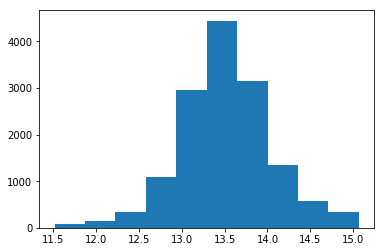

In [116]:
import matplotlib.pyplot as plt
plt.hist(np.log(train_y))

In [117]:
regr = RandomForestRegressor(n_estimators = 100, max_depth=100, random_state=0)
regr.fit(train_X, np.log(train_y))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [118]:
y_pred = regr.predict(test_X)

In [120]:
np.max(test_y)

3275000

In [121]:
np.min(test_y)

100000

In [122]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, np.exp(y_pred))))

Root Mean Squared Error: 501567.7806639821


In [170]:
df.to_csv("rental_processed.csv", index=False)

In [174]:
from sklearn.externals import joblib
joblib.dump(regr, "random_forest.pkl")

['random_forest.pkl']

In [183]:
test_user = np.array([[10044, 1316, 2001, 1]])

In [189]:
regr.predict(test_user)

array([1878500.])

In [187]:
rf = joblib.load('random_forest.pkl')

In [188]:
rf.predict(test_user)

array([1878500.])